In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# LOAD DATA

In [2]:
#Getting the file path

DATA_PATH = '/Users/TygaBRii/Downloads/ML/'

file_transc = DATA_PATH+'train_transaction.csv'
file_idn = DATA_PATH+'train_identity.csv'

print(file_transc,'\n', file_idn)

/Users/TygaBRii/Downloads/ML/train_transaction.csv 
 /Users/TygaBRii/Downloads/ML/train_identity.csv


In [3]:
#TRANSACTION TABLE
train_txn = pd.read_csv(file_transc)
print(train_txn.shape)
train_txn.head()

(590540, 394)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#IDENTITY TABLE
train_idn = pd.read_csv(file_idn)
print(train_idn.shape)
train_idn.head()

(144233, 41)


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
# Create a dummy table to avoid changing the main table
dummy_txn = pd.read_csv(file_transc)
dummy_idn = pd.read_csv(file_idn)

# Handling Anonymous Columns

## Train Transaction - train_txn

In [6]:
def get_nan_dic(df):
    """
    get NaN dictionary
    return: a dictionary with #of null values as key and feature names as value
    """
    nulls = df.isna()
    nan_dic = {}
    for f in df.columns:
        c=nulls[f].sum()
        nan_dic[c]=[]
    for f in df.columns:
        c = nulls[f].sum()
        nan_dic[c].append(f)
    return nan_dic

In [7]:
nan_dic = get_nan_dic(train_txn)
print(nan_dic)

{0: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14'], 8933: ['card2'], 1565: ['card3'], 1577: ['card4'], 4259: ['card5'], 1571: ['card6'], 65706: ['addr1', 'addr2'], 352271: ['dist1'], 552913: ['dist2'], 94456: ['P_emaildomain'], 453249: ['R_emaildomain'], 1269: ['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315'], 280797: ['D2'], 262878: ['D3'], 168922: ['D4'], 309841: ['D5'], 517353: ['D6'], 551623: ['D7'], 515614: ['D8', 'D9'], 76022: ['D10'], 279287: ['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'], 525823: ['D12'], 528588: ['D13'], 528353: ['D14'], 89113: ['D15'], 271100: ['M1', 'M2', 'M3'], 281444: ['M4'], 350482: ['M5'], 169360: ['M6'], 346265: ['M7'], 346252: ['M8', 'M9'], 76073: ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V

##### Function to change object categories to integers values

In [8]:
def transfer_cat_2_int(train_df):
    print("Start transfer categorical values to integer ...")
    category_columns = train_df.select_dtypes(include=['category', object]).columns
    for f in category_columns:
        train_df[f] = train_df[f].astype(str)
        le = LabelEncoder()
        train_df[f] = le.fit_transform(train_df[f])

##### Correlation function

In [9]:
#let us check this group, I wrote this function to plot correlation matrix as heatmap
def plot_corr(df,cols):
    fig = plt.figure(figsize=(12,8))
    sns.heatmap(df[cols].corr(),cmap='RdBu_r', annot=True, center=0.0)
    plt.show()

##### Marco

In [10]:
Vs = nan_dic[8933] + nan_dic[1565] + nan_dic[1577] + nan_dic[4259] + nan_dic[1571] + nan_dic[65706] + nan_dic[552913] + nan_dic[94456] + nan_dic[508189] 
Vs

['card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist2',
 'P_emaildomain',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339']

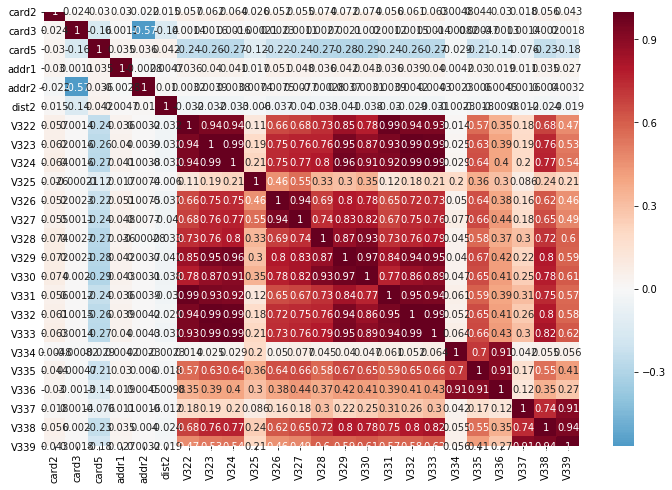

In [11]:
plot_corr(train_txn,Vs)

In [12]:
#DROPPING COLUMNS
train_txn.drop(['V322', 'V323', 'V326', 'V330', 'V331', 'V333', 'V336', 'V334', 'V337', 'V339'],axis=1,inplace=True) 


##### Yifan

In [13]:
#check the features that has the same NAN values
ig = nan_dic[12]
ig

['V279',
 'V280',
 'V284',
 'V285',
 'V286',
 'V287',
 'V290',
 'V291',
 'V292',
 'V293',
 'V294',
 'V295',
 'V297',
 'V298',
 'V299',
 'V302',
 'V303',
 'V304',
 'V305',
 'V306',
 'V307',
 'V308',
 'V309',
 'V310',
 'V311',
 'V312',
 'V316',
 'V317',
 'V318',
 'V319',
 'V320',
 'V321']

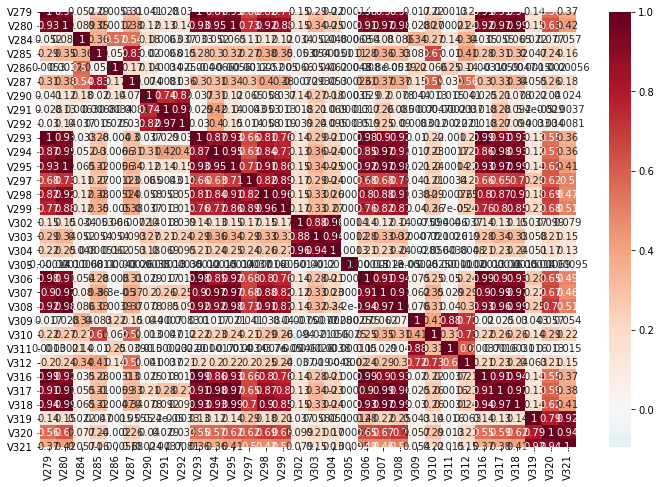

In [14]:
plot_corr(train_txn, ig)

In [15]:
#For 12 High corr columns need to drop 
cp_list_corr = ['V291','V292','V294','V295', 'V298','V299','V307','V308','V317','V318']


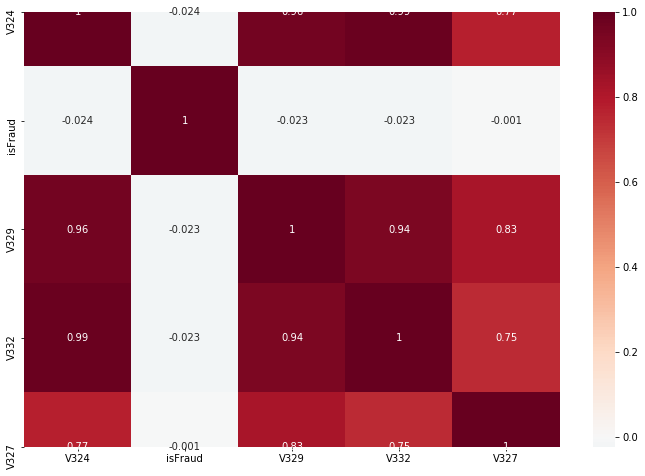

In [16]:
#create a list that compare High corr columns with target 
#For 508189 High corr columns need to drop 
cp_list1 = ['V324','isFraud','V329','V332','V327']

#find the least corr with target by ploting it 
plot_corr(train_txn, cp_list1) 

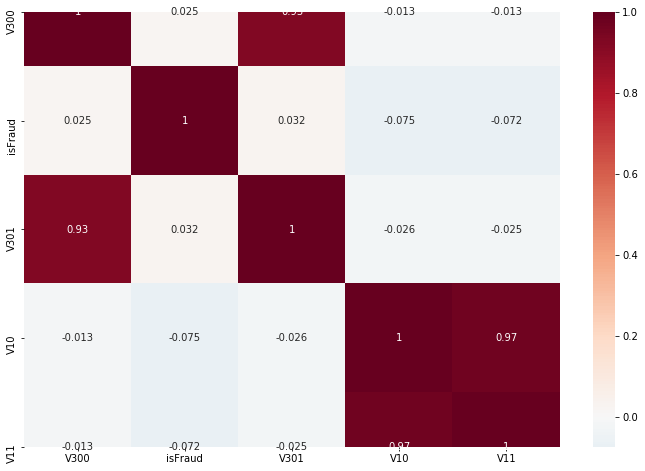

In [17]:
#For 1269 & 279287 High corr columns need to drop 
cp_list2_3 = ['V300', 'isFraud', 'V301', 'V10','V11']
plot_corr(train_txn, cp_list2_3) 

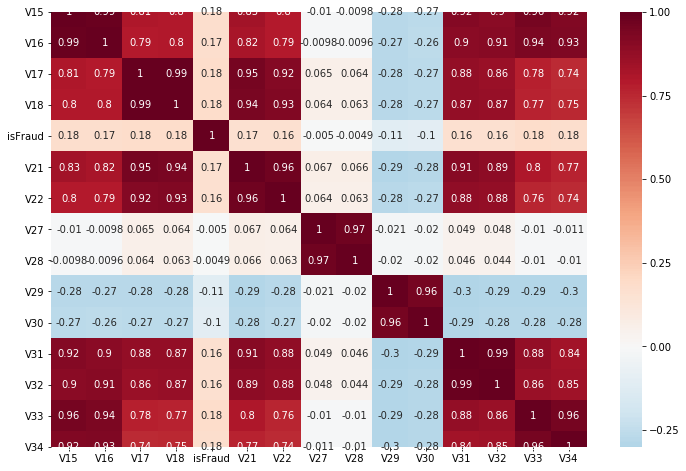

In [18]:
#For 76073 High corr columns need to drop 
cp_list4 = ['V15','V16','V17','V18','isFraud','V21','V22','V27','V28','V29','V30','V31','V32','V33','V34']
plot_corr(train_txn, cp_list4) 

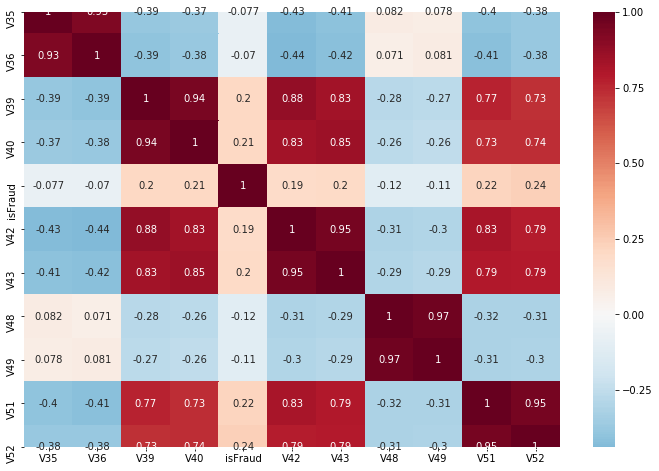

In [19]:
#For 168969 High corr columns need to drop 
cp_list5 = ['V35','V36','V39','V40','isFraud','V42','V43','V48','V49','V51','V52']
plot_corr(train_txn, cp_list5) 

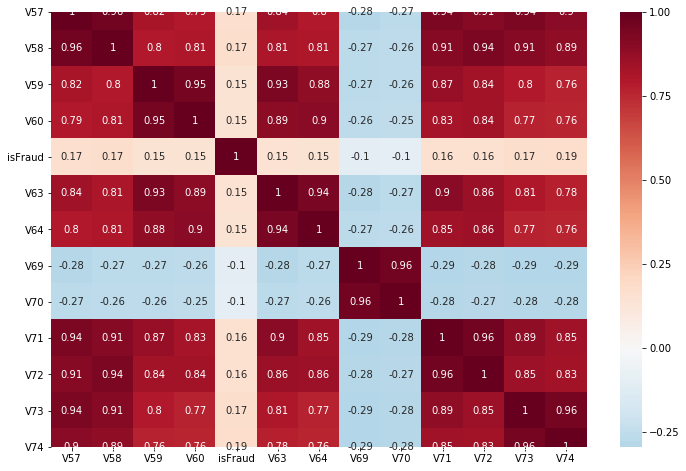

In [20]:
#For 77096 High corr columns need to drop 
cp_list6 = ['V57','V58','V59','V60','isFraud','V63','V64','V69','V70','V71','V72','V73','V74']
plot_corr(train_txn, cp_list6) 

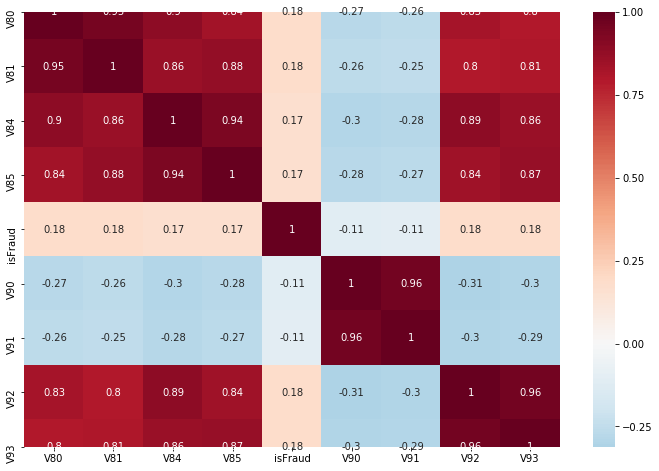

In [21]:
#For 89164 High corr columns need to drop 
cp_list7 = ['V80','V81','V84','V85','isFraud','V90','V91','V92','V93']
plot_corr(train_txn, cp_list7) 

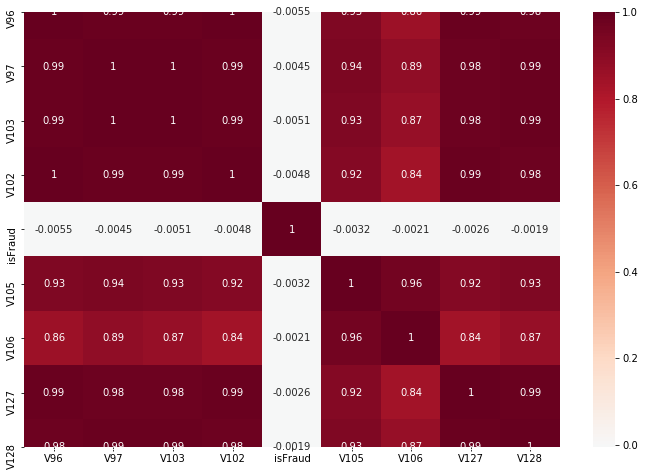

In [22]:
#For 314 High corr columns need to drop 
cp_list8 = ['V96','V97','V103','V102','isFraud','V105','V106','V127','V128']
plot_corr(train_txn, cp_list8) 

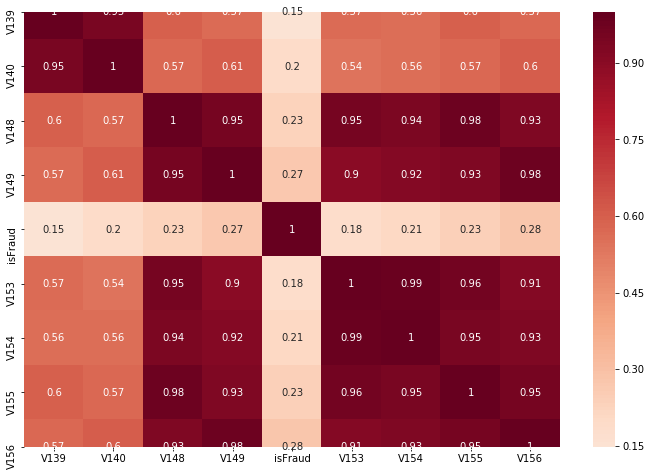

In [23]:
#For 508595 High corr columns need to drop 
cp_list9 = ['V139','V140','V148','V149','isFraud','V153','V154','V155','V156']
plot_corr(train_txn, cp_list9) 

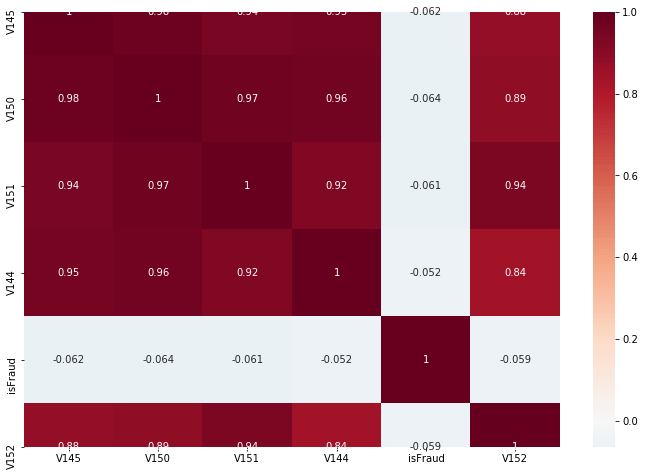

In [24]:
#For 508589 High corr columns need to drop 
cp_list10 = ['V145','V150','V151','V144','isFraud','V152']
plot_corr(train_txn, cp_list10) 

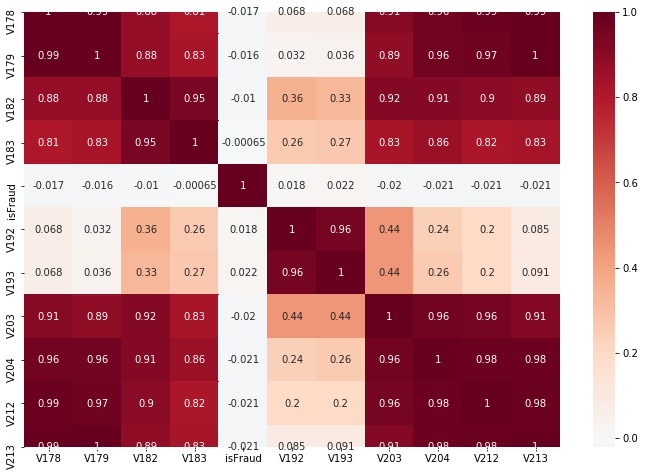

In [25]:
#For 450909 High corr columns need to drop 
cp_list11 = ['V178','V179','V182','V183','isFraud','V192','V193','V203','V204','V212','V213']
plot_corr(train_txn, cp_list11) 

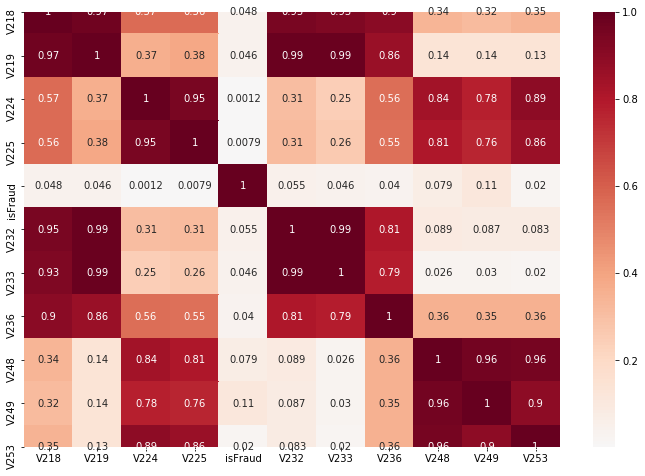

In [26]:
#For 460110 High corr columns need to drop 
cp_list12 = ['V218','V219','V224','V225','isFraud','V232','V233','V236','V248','V249','V253']
plot_corr(train_txn, cp_list12)  

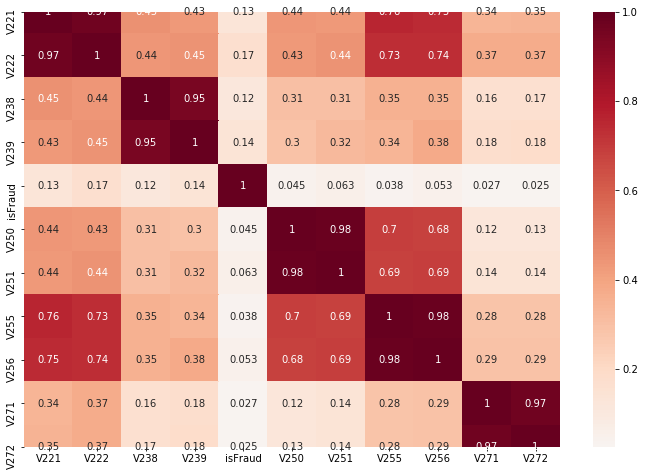

In [27]:
#For 449124 High corr columns need to drop 
cp_list13 = ['V221','V222','V238','V239','isFraud','V250','V251','V255','V256','V271','V272']
plot_corr(train_txn, cp_list13) 

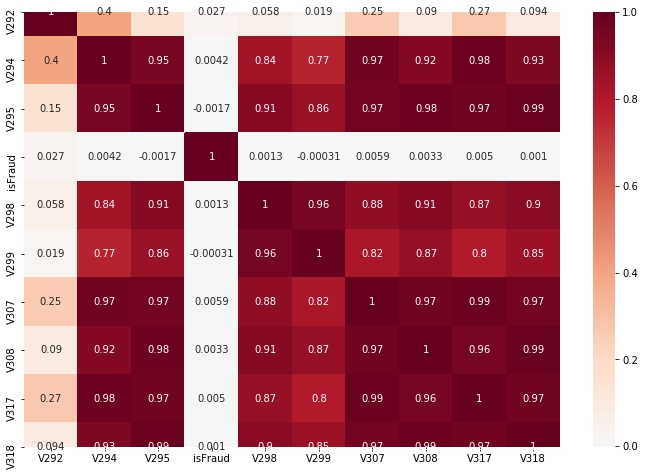

In [28]:
#For 12 High corr columns need to drop 
cp_list14 = ['V292','V294','V295','isFraud','V298','V299','V307','V308','V317','V318']
plot_corr(train_txn, cp_list14) 

In [29]:
#DROPPING COLUMNS:
train_txn.drop(['V324','V329','V300','V16','V17','V22','V27','V29','V31','V33','V35','V39','V42','V48','V51','V57','V59','V63','V69','V71','V73','V80','V84','V90','V92','V96','V103','V105','V127','V139','V148','V153','V155','V150','V178','V182','V192','V204','V212','V219','V224','V233','V248','V221','V238','V250','V255','V272','V295','V299','V308','V318'], axis=1,inplace=True)

#ALL the columns need to be drop in transcation_train dataset after mannuly selection.

##### Saidath

['D11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11']


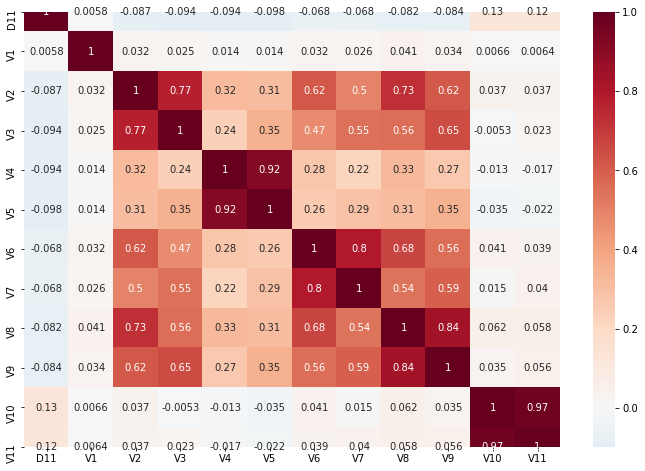

In [30]:
Vs = nan_dic[279287]
print(Vs)
plot_corr(train_txn,Vs)

['D12', 'D13', 'D14', 'D15']


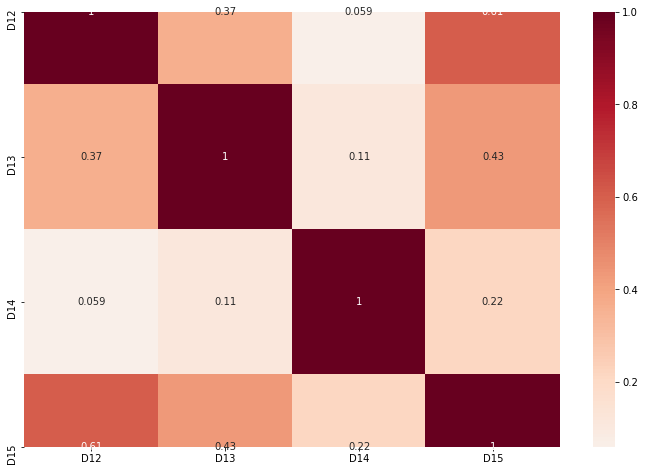

In [31]:
Vs = nan_dic[525823] + nan_dic[528588] + nan_dic[528353] + nan_dic[89113] 
print(Vs)
plot_corr(train_txn,Vs)

In [32]:
## Changing categorical values
transfer_cat_2_int(dummy_txn)

Start transfer categorical values to integer ...


Columns M1 to M7 are object type column and cannot be plotted using the heatmap or using direct correlation. Therefore they are converted into numerical values before plotting.

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']


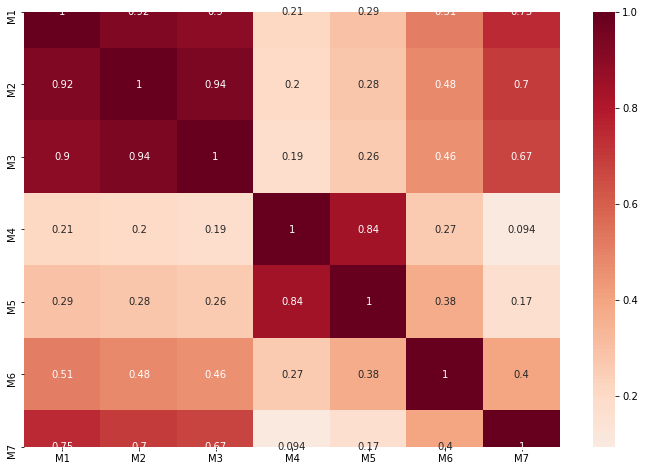

In [33]:
Vs = nan_dic[271100] + nan_dic[281444] + nan_dic[350482] + nan_dic[169360] + nan_dic[346265]
print(Vs)
plot_corr(dummy_txn,Vs)

In [34]:
#DROPPING COLUMNS:
train_txn.drop(['V2','V4','V6','V8','V11','M2','M3','M5','M7'], axis=1, inplace=True)


##### Jun

###### Function to drop columns

In [35]:
def drop_corr_column(df):
    print("Start drop corr columns ...")
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    # Drop features
    df.drop(df[to_drop], axis=1, inplace=True)
    print(df.info())

In [36]:
drop_corr_column(train_txn)

Start drop corr columns ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 252 entries, TransactionID to V338
dtypes: float64(239), int64(3), object(10)
memory usage: 1.1+ GB
None


In [37]:
train_txn.head()

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V312,V313,V314,V315,V319,V320,V321,V325,V335,V338
0,2987000,0,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2987001,0,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2987002,0,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2987003,0,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,135.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2987004,0,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Identity - train_idn

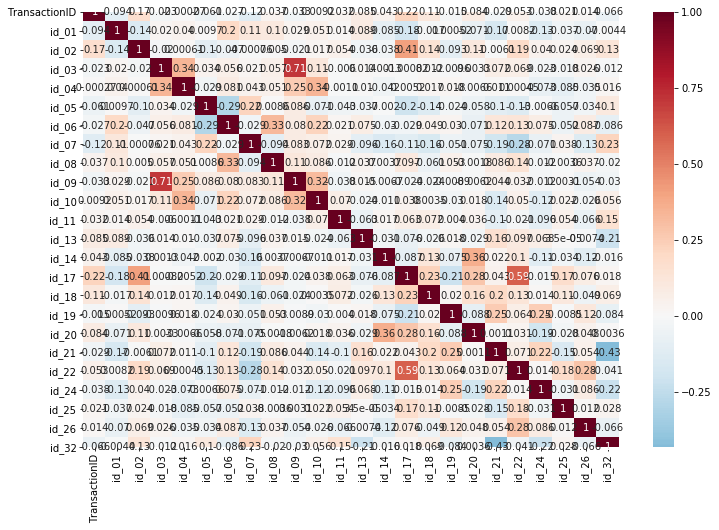

In [38]:
cols_idn = []
for i in train_idn.columns:
    cols_idn.append(i)

plot_corr(train_idn,cols_idn)


No columns seem to be correlated to one another.
Only col id_03 & id_09 show some correlation but it is only 70%

In [39]:
#**Maybe
#train_idn.drop(['id_09'], axis=1, inplace=True)


# FILLING EMPTY VALUES

In [40]:
def handle_NaN(train_df):
    # Check for Nan amount in every column
    print("start to handle NaN ...")
    nan_info = pd.DataFrame(train_df.isnull().sum()).reset_index()
    nan_info.columns = ['col', 'nan_cnt']
    nan_info.sort_values(by='nan_cnt', ascending=False, inplace=True)
    # Columns with missing values
    cols_with_missing = nan_info.loc[nan_info.nan_cnt > 0].col.values
    # Fill missing values (numbers) with the median
    for f in cols_with_missing:
        if str(train_df[f].dtype) != 'object':
            train_df[f].fillna(train_df[f].median(), inplace=True)
    # Fill missing values (objects) with Unknown
    for f in cols_with_missing:
        if str(train_df[f].dtype) == 'object':
            train_df[f].fillna('Unknown', inplace=True)
    # Check if there are still Nan values
    nan_info = pd.DataFrame(train_df.isnull().sum()).reset_index()
    nan_info.columns = ['col', 'nan_cnt']
    nan_info.sort_values(by='nan_cnt', ascending=False, inplace=True)
    print(nan_info)


In [41]:
handle_NaN(train_txn)

start to handle NaN ...
               col  nan_cnt
0    TransactionID        0
173           V198        0
160           V183        0
161           V184        0
162           V185        0
..             ...      ...
88             V75        0
89             V76        0
90             V77        0
91             V78        0
251           V338        0

[252 rows x 2 columns]


In [42]:
handle_NaN(train_idn)

start to handle NaN ...
              col  nan_cnt
0   TransactionID        0
21          id_21        0
23          id_23        0
24          id_24        0
25          id_25        0
26          id_26        0
27          id_27        0
28          id_28        0
29          id_29        0
30          id_30        0
31          id_31        0
32          id_32        0
33          id_33        0
34          id_34        0
35          id_35        0
36          id_36        0
37          id_37        0
38          id_38        0
39     DeviceType        0
22          id_22        0
20          id_20        0
1           id_01        0
19          id_19        0
2           id_02        0
3           id_03        0
4           id_04        0
5           id_05        0
6           id_06        0
7           id_07        0
8           id_08        0
9           id_09        0
10          id_10        0
11          id_11        0
12          id_12        0
13          id_13        0
14  

# MEMORY USAGE

In [43]:
#MEMORY BEFORE ANY CHANGES
mem_use = train_txn.memory_usage().sum() / 1024**3 
print('Memory usage of train_transc is {:.6f} GB'.format(mem_use))
mem_use = train_idn.memory_usage().sum() / 1024**2 
print('Memory usage of train_idn is {:.6f} MB'.format(mem_use))

Memory usage of train_transc is 1.108766 GB
Memory usage of train_idn is 45.116951 MB


In [44]:
#Float range
f64_max = 1.7976931348623157e+308
f64_min =  -1.7976931348623157e+308

f32_max = 3.4028235e+38
f32_min = -3.4028235e+38

f16_max = 65500.0
f16_min = -65500.0

#Integer range
i64_max = 9223372036854775807
i64_min =  -9223372036854775808

i32_max =  2147483647
i32_min = -2147483648

i16_max = 32767
i16_min = -32768
        

In [45]:
#Funtion to reduce datatype
def change_dtype(train):
    for m in train.columns:
        if str(train[m].dtype) == 'int64':
            #Min & Max value of all columns with integer datatype
            train[m].max()
            train[m].min()
            if train[m].max() < i16_max and train[m].min() > i16_min :
                #convert column into int16
                train[m] = train[m].astype(np.int16)
            else: 
                if train[m].max() < i32_max and train[m].min() > i32_min :
                    #convert column into int32
                    train[m] = train[m].astype(np.int32)
                
        
    for m in train.columns:
        if str(train[m].dtype) == 'float64':
            #Min & Max value of all columns with float datatype
            train[m].max()
            train[m].min()
            if train[m].max() < f16_max and train[m].min() > f16_min :
                #convert column into float16
                train[m] = train[m].astype(np.float16)
            else:
                if train[m].max() < f32_max and train[m].min() > f32_min :
                    #convert column into float32
                    train[m] = train[m].astype(np.float32)
                
                    
                    

In [46]:
change_dtype(train_txn)
change_dtype(train_idn)

In [47]:
#MEMORY AFTER CHANGES
mem_use = train_txn.memory_usage().sum() / 1024**3 
print('Memory usage of train_transc is {:.6f} GB'.format(mem_use))
mem_use = train_idn.memory_usage().sum() / 1024**2 
print('Memory usage of train_idn is {:.6f} MB'.format(mem_use))

Memory usage of train_transc is 0.328890 GB
Memory usage of train_idn is 25.859768 MB


# HANDLING FEATURES

## Train Transaction - train_trx

### Handling Emails

In [48]:
# Function to clean the names
def assign_region(email_addr):
    REGION = {
        ".jp": "Japan",
        ".fr": "French",
        ".uk": "UK",
        ".mx": "Mexico",
        ".de": "German",
        ".es": "Spain",
        ".com": "Global",
        ".net": "Global"
    }
    for key in REGION.keys():
        if email_addr.find(key) != -1:
            return REGION[key]


In [49]:
def handl_P_emaildomain(train_df):
    print("start to handle  P_emaildomain...")
    # process NaN value
    train_df['P_emaildomain'].fillna('TBD', inplace=True)
    #create a new column
    train_df = train_df.assign(Region_emaildomain=train_df['P_emaildomain'])
    # process P_emaildomain column
    train_df.loc[train_df['P_emaildomain'] == 'TBD', 'Region_emaildomain'] = 'Global'
    train_df.loc[train_df['P_emaildomain'] == 'yahoo', 'P_emaildomain'] = 'yahoo.com'
    train_df.loc[train_df['P_emaildomain'] == 'gmail', 'P_emaildomain'] = 'gmail.com'
    train_df['Region_emaildomain'] = train_df['Region_emaildomain'].apply(assign_region)
    

In [50]:
handl_P_emaildomain(train_txn)

start to handle  P_emaildomain...


In [80]:
train_txn['P_emaildomain'].unique()

array(['Unknown', 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

### Handling Addr1 & Addr2

Here we are grouping addr1 and addr2 into numerical categories.

In [52]:
# Addr1
print('Unitial amount of categories:', train_txn['addr1'].nunique())
cut_labels = ['1', '2', '3', '4']
cut_bins = [0, 200, 300, 400, train_txn['addr1'].max()]
train_txn['addr1'] = pd.cut(train_txn['addr1'], bins=cut_bins, labels=cut_labels)

print('Unique values:', train_txn['addr1'].unique())


Unitial amount of categories: 332
Unique values: [3, 4, 2, 1]
Categories (4, object): [1 < 2 < 3 < 4]


In [53]:
#Addr2
print('Unitial amount of categories:', train_txn['addr2'].nunique())

cut_labels = ['1', '2', '3', '4', '5']
cut_bins = [0, 20, 40, 60, 80, train_txn['addr2'].max()]
train_txn['addr2'] = pd.cut(train_txn['addr2'], bins=cut_bins, labels=cut_labels)

print('Unique values:', train_txn['addr2'].unique())

Unitial amount of categories: 74
Unique values: [5, 2, 3, 4, 1]
Categories (5, object): [1 < 2 < 3 < 4 < 5]


### Handling Card 1 to 6

Here we are grouping cards into numerical categories.

In [54]:
# CARD1
print('Unitial amount of categories:', train_txn['card1'].nunique())

cut_labels = ['1', '2', '3', '4', '5', '6']
cut_bins = [0, 4001, 7001, 10000, 13000, 16000, train_txn['card1'].max()]
train_txn['card1'] = pd.cut(train_txn['card1'], bins=cut_bins, labels=cut_labels)

print('Unique values:', train_txn['card1'].unique())


Unitial amount of categories: 13553
Unique values: [5, 1, 2, 6, 4, 3]
Categories (6, object): [1 < 2 < 3 < 4 < 5 < 6]


In [55]:
# CARD2
print('Unitial amount of categories:', train_txn['card2'].nunique())

cut_labels = ['1', '2', '3', '4', '5']
cut_bins = [0, 200, 300, 400, 500, train_txn['card2'].max()]
train_txn['card2'] = pd.cut(train_txn['card2'], bins=cut_bins, labels=cut_labels)

print('Unique values:', train_txn['card2'].unique())


Unitial amount of categories: 500
Unique values: [3, 4, 5, 1, 2]
Categories (5, object): [1 < 2 < 3 < 4 < 5]


In [56]:
# CARD3
print('Unitial amount of categories:', train_txn['card3'].nunique())

cut_labels = ['1', '2', '3']
cut_bins = [0, 150, 200, train_txn['card3'].max()]
train_txn['card3'] = pd.cut(train_txn['card3'], bins=cut_bins, labels=cut_labels)

print('Unique values:', train_txn['card3'].unique())


Unitial amount of categories: 114
Unique values: [1, 2, 3]
Categories (3, object): [1 < 2 < 3]


In [57]:
# CARD4
print('Unique values:', train_txn.card4.unique())

Unique values: ['discover' 'mastercard' 'visa' 'american express' 'Unknown']


In [58]:
# CARD5
print('Unitial amount of categories:', train_txn['card5'].nunique())
cut_labels = ['1', '2', '3']
cut_bins = [0, 150, 200, train_txn['card5'].max()]
train_txn['card5'] = pd.cut(train_txn['card5'], bins=cut_bins, labels=cut_labels)

print('Unique values:', train_txn['card3'].unique())


Unitial amount of categories: 119
Unique values: [1, 2, 3]
Categories (3, object): [1 < 2 < 3]


In [59]:
# CARD6
print('Unique values:', train_txn.card6.unique())

Unique values: ['credit' 'debit' 'Unknown' 'debit or credit' 'charge card']


### Handling Transaction amt


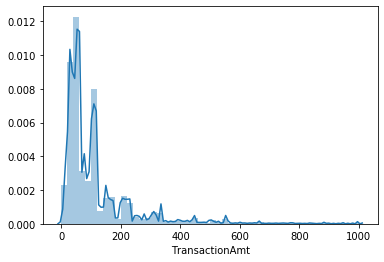

In [60]:
g = train_txn['TransactionAmt']
filtered = g[(g >= 0) & (g < 1000)]
sns.distplot(filtered, kde=True, hist=True, hist_kws={"range": [0,1000]})

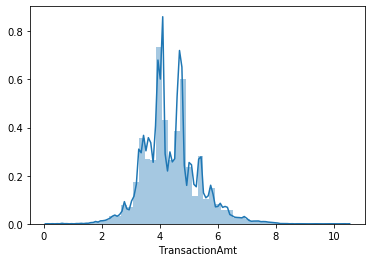

In [61]:
sns.distplot(np.log1p(train_txn['TransactionAmt']))

## Train Identity - train_idn

### Handling id_31

Using id_31 we can determine the browser used

In [62]:
train_idn['id_31'].unique()

array(['samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0',
       'Unknown', 'chrome 62.0 for android', 'edge 15.0',
       'mobile safari generic', 'chrome 49.0', 'chrome 61.0', 'edge 16.0',
       'safari generic', 'edge 14.0', 'chrome 56.0 for android',
       'firefox 57.0', 'chrome 54.0 for android',
       'mobile safari uiwebview', 'chrome', 'chrome 62.0 for ios',
       'firefox', 'chrome 60.0 for android', 'mobile safari 10.0',
       'chrome 61.0 for android', 'ie 11.0 for desktop',
       'ie 11.0 for tablet', 'mobile safari 9.0', 'chrome generic',
       'other', 'chrome 59.0 for android', 'firefox 56.0',
       'android webview 4.0', 'chrome 55.0', 'opera 49.0', 'ie',
       'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0

In [63]:
browser_list = ['samsung browser', 'android browser','mobile safari',
                'google','safari', 'chrome', 'edge','firefox','ie',
                'opera','aol','silk','waterfox' ,'Nokia/Lumia','puffin',
                'Microsoft/Windows','cyberfox','Generic/Android',
                'palemoon','maxthon','line','LG/K-200','iron','BLU/Dash',
                'seamonkey','M4Tel','comodo','Lanix/Ilium','chromium',
                'Inco/Minion','Cherry', 'icedragon', 'facebook']



In [64]:
row = 0
for i in train_idn['id_31']:
    for y in browser_list :
        if y in str(i):
            train_idn.set_value(row,'id_31', y)
    row = row + 1


In [65]:
train_idn['id_31'].unique()

array(['samsung browser', 'safari', 'chrome', 'Unknown', 'edge',
       'firefox', 'ie', 'other', 'opera', 'Generic/Android', 'mobile',
       'Samsung/SM-G532M', 'aol', 'Samsung/SCH', 'silk',
       'Samsung/SM-G531H', 'waterfox', 'Nokia/Lumia', 'puffin',
       'Microsoft/Windows', 'cyberfox', 'samsung', 'ZTE/Blade',
       'android browser', 'palemoon', 'maxthon', 'line', 'LG/K-200',
       'iron', 'BLU/Dash', 'seamonkey', 'M4Tel', 'comodo', 'Lanix/Ilium',
       'chromium', 'Inco/Minion', 'Mozilla/Firefox', 'Cherry',
       'icedragon', 'android', 'google', 'facebook'], dtype=object)

### Handling id_33

Editing the screen resolution

References : https://www.digitalcitizen.life/what-screen-resolution-or-aspect-ratio-what-do-720p-1080i-1080p-mean

https://en.wikipedia.org/wiki/Display_resolution

    VGA : 640x480; 
    HD : 1280x720 ;    
    Full HD : 1920x1080 ;    
    Quad HD : 2560x1440 ;      
    Ultra HD : 3840x2160;      
    Ultra HD TV: 7680x4320;      
    10K HD : 10240x(any) ;     
    Quad Ultra HD : 15360x8640; 
    

In [66]:
train_idn['id_33'].unique()

array(['2220x1080', '1334x750', 'Unknown', '1280x800', '1366x768',
       '1920x1080', '1680x1050', '1136x640', '5120x2880', '2880x1800',
       '1920x1200', '2560x1600', '2048x1536', '1024x768', '1280x720',
       '2560x1440', '2208x1242', '2001x1125', '1440x900', '1600x900',
       '2672x1440', '1280x1024', '960x540', '2732x2048', '2436x1125',
       '2048x1152', '2960x1440', '1024x600', '855x480', '4096x2304',
       '2160x1440', '2562x1442', '801x480', '2736x1824', '3441x1440',
       '2880x1620', '3840x2160', '1638x922', '1280x768', '1360x768',
       '1280x960', '3440x1440', '1152x720', '1280x1025', '3360x2100',
       '2304x1296', '1152x864', '3200x1800', '2112x1188', '2224x1668',
       '2400x1350', '2000x1125', '1600x1000', '2560x1080', '1728x972',
       '3000x2000', '1024x640', '3840x2400', '2304x1440', '1280x600',
       '1400x1050', '1600x1200', '3201x1800', '1356x900', '1344x756',
       '1624x1080', '1536x864', '1800x1125', '1920x1281', '2961x1442',
       '1366x1024', '

In [78]:
def screen_resolution(df):
    row = -1
    for a in train_idn['id_33']:
        row = row + 1
        a_list = str(a).split("x")
        if a_list[0] == 'Unknown':
            continue
        # VGA : 640x480
        elif int(a_list[0]) < 1280 and int(a_list[0]) > 0:
            train_idn.set_value(row,'id_33', 'VGA')
        # HD : 1280x720 ; 
        elif int(a_list[0]) >=1280 and int(a_list[0]) < 1920:
            train_idn.set_value(row,'id_33', 'HD')
        # Full HD : 1920x1080 ;
        elif int(a_list[0]) >=1920 and int(a_list[0]) < 2560:
            train_idn.set_value(row,'id_33', 'Full HD')
        # Quad HD : 2560x1440 ; 
        elif int(a_list[0]) >=2560 and int(a_list[0]) < 3840:
            train_idn.set_value(row,'id_33', 'Quad HD')
        # Ultra HD : 3840x2160;
        elif int(a_list[0]) >=3840 and int(a_list[0]) < 7680:
            train_idn.set_value(row,'id_33', 'Ultra HD')
        # Ultra HD TV: 7680x4320;
        elif int(a_list[0]) >=7680 and int(a_list[0]) < 10240:
            train_idn.set_value(row,'id_33', 'Ultra HD TV')
        # 10K HD : 10240x(any) ;
        elif int(a_list[0]) >=10240 and int(a_list[0]) < 15360:
            train_idn.set_value(row,'id_33', '10K HD')
        # Quad Ultra HD : 15360x8640; >=15360
        elif int(a_list[0]) >=15360:
            train_idn.set_value(row,'id_33', 'Quad Ultra HD')
    
    

In [79]:
screen_resolution(train_idn)

ValueError: invalid literal for int() with base 10: 'Full HD'

In [75]:
train_idn['id_33'].unique()

array(['Full HD', 'HD', 'Unknown', '1280x800', '1366x768', '1920x1080',
       '1680x1050', '1136x640', '1334x750', '5120x2880', '2880x1800',
       '1920x1200', '2560x1600', '2048x1536', '1024x768', '1280x720',
       '2560x1440', '2208x1242', '2001x1125', '1440x900', '1600x900',
       '2672x1440', '1280x1024', '2220x1080', '960x540', '2732x2048',
       '2436x1125', '2048x1152', '2960x1440', '1024x600', '855x480',
       '4096x2304', '2160x1440', '2562x1442', '801x480', '2736x1824',
       '3441x1440', '2880x1620', '3840x2160', '1638x922', '1280x768',
       '1360x768', '1280x960', '3440x1440', '1152x720', '1280x1025',
       '3360x2100', '2304x1296', '1152x864', '3200x1800', '2112x1188',
       '2224x1668', '2400x1350', '2000x1125', '1600x1000', '2560x1080',
       '1728x972', '3000x2000', '1024x640', '3840x2400', '2304x1440',
       '1280x600', '1400x1050', '1600x1200', '3201x1800', '1356x900',
       '1344x756', '1624x1080', '1536x864', '1800x1125', '1920x1281',
       '2961x1442